In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

/Users/thomasttam/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Import Cleaned Data

In [4]:
data = pd.read_csv('csv_files/cleaned_data.csv',index_col=0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19087 non-null  float64
 1   bedrooms       19087 non-null  int64  
 2   bathrooms      19087 non-null  float64
 3   sqft_living    19087 non-null  int64  
 4   sqft_lot       19087 non-null  int64  
 5   floors         19087 non-null  float64
 6   waterfront     19087 non-null  int64  
 7   view           19087 non-null  int64  
 8   condition      19087 non-null  int64  
 9   sqft_above     19087 non-null  int64  
 10  sqft_basement  19087 non-null  float64
 11  yr_built       19087 non-null  int64  
 12  zipcode        19087 non-null  int64  
 13  lat            19087 non-null  float64
 14  long           19087 non-null  float64
 15  sqft_living15  19087 non-null  int64  
 16  sqft_lot15     19087 non-null  int64  
 17  quarter_sold   19087 non-null  int64  
 18  year_s

In [6]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,lat,long,sqft_living15,sqft_lot15,quarter_sold,year_sold,decade_built,grade_binned,renovated,basement
0,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,...,47.7210,-122.319,1690,7639,4,2014,1950,Fair,1,1
1,180000.0,2,1.00,770,10000,1.0,0,0,3,770,...,47.7379,-122.233,2720,8062,1,2015,1930,Fair,0,0
2,604000.0,4,3.00,1960,5000,1.0,0,0,5,1050,...,47.5208,-122.393,1360,5000,4,2014,1960,Fair,0,1
3,510000.0,3,2.00,1680,8080,1.0,0,0,3,1680,...,47.6168,-122.045,1800,7503,1,2015,1980,Fair,0,0
4,1230000.0,4,4.50,5420,101930,1.0,0,0,3,3890,...,47.6561,-122.005,4760,101930,2,2014,2000,Good,0,1


# 2. Feature Engineering

In addition to month_sold, year_sold, decade, and city we want to add new features to further increase the model.
* **total_sqft**: sqft_living + sqft_lot
* **total_sqft_inside**: sqft_above + sqft_basement
* **age_when_sold**: yr_sold - yr_built
* **city**: location of the house based on zipcode

## Total Square Feet

Description: Total square feet of all property, house and lot

In [7]:
# create total_sqft column
data['total_sqft'] = data['sqft_living'] + data['sqft_lot']

total_sqft_values = data['total_sqft'].count()
total_sqft_nunique = data['total_sqft'].nunique()
total_sqft_missing_values = data['total_sqft'].isna().sum()

print(f'Number of values: {total_sqft_values}')
print(f'Number of unique values: {total_sqft_nunique}')
print(f'Missing values: {total_sqft_missing_values}')

Number of values: 19087
Number of unique values: 10322
Missing values: 0


## Total Square Feet Inside

Description: Total square feet of only the house

In [8]:
# create total_sqft_inside column
data['total_sqft_inside'] = data['sqft_above'] + data['sqft_basement']

total_sqft_inside_values = data['total_sqft_inside'].count()
total_sqft_inside_nunique = data['total_sqft_inside'].nunique()
total_sqft_inside_missing_values = data['total_sqft_inside'].isna().sum()

print(f'Number of values: {total_sqft_inside_values}')
print(f'Number of unique values: {total_sqft_inside_nunique}')
print(f'Missing values: {total_sqft_inside_missing_values}')

Number of values: 19087
Number of unique values: 990
Missing values: 0


In [9]:
pd.concat([data['total_sqft_inside'].value_counts(dropna=False),
           round((data['total_sqft_inside'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,total_sqft_inside,%
1300.0,125,0.65
1400.0,121,0.63
1440.0,120,0.63
1820.0,116,0.61
1320.0,113,0.59
...,...,...
3135.0,1,0.01
1767.0,1,0.01
1315.0,1,0.01
2253.0,1,0.01


In [10]:
# remove basement column
data = data.drop(['sqft_basement'],axis = 1)

## Age When Sold

Description: the age of the house when it was sold, year_sold - yr_built

In [11]:
data['age_when_sold'] = data['year_sold'] - data['yr_built']

age_when_sold_values = data['age_when_sold'].count()
age_when_sold_nunique = data['age_when_sold'].nunique()
age_when_sold_missing_values = data['age_when_sold'].isna().sum()

print(f'Number of values: {age_when_sold_values}')
print(f'Number of unique values: {age_when_sold_nunique}')
print(f'Missing values: {age_when_sold_missing_values}')

Number of values: 19087
Number of unique values: 117
Missing values: 0


In [12]:
pd.concat([data['age_when_sold'].value_counts(dropna=False),
           round((data['age_when_sold'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,age_when_sold,%
9,423,2.22
0,388,2.03
8,383,2.01
11,375,1.96
10,367,1.92
...,...,...
113,26,0.14
115,20,0.10
81,19,0.10
80,18,0.09


In [13]:
# got values with -1 results which means the house was sold before it was even built
    # replacing -1 values with 0
data['age_when_sold'] = data['age_when_sold'].replace(-1,0)

In [14]:
# remove yr_built column
data = data.drop(['yr_built'],axis = 1)
data = data.drop(['year_sold'],axis = 1)

## City

There are many unique values for zipcodes in which I decided to combine the zip codes by their city. I didn't have the zip code data for King County so I had to web scrape from zip-codes.com website to get the zip code and the respective city.

In [15]:
from bs4 import BeautifulSoup
import requests

url = 'https://www.zip-codes.com/county/wa-king.asp#zipcodes'
page = requests.get(url)
soup = BeautifulSoup(page.content,'html.parser')
tb = soup.find('table',class_='statTable')

list_zip_codes = []
for link in tb.find_all('td'):
    zip_code = link.find('a')
    if zip_code is None:
        continue
    list_zip_codes.append(zip_code.get_text('title'))

zip_code_df = pd.concat([pd.Series([list_zip_codes[i][-5:] for i in range(0,len(list_zip_codes),2)]).astype('int64'),
                         pd.Series([list_zip_codes[i] for i in range(1,len(list_zip_codes),2)])],axis=1).rename(columns={0:'zipcode',1:'city'})
zip_code_df.head()

,zipcode,city
0,98001,Auburn
1,98002,Auburn
2,98003,Federal Way
3,98004,Bellevue
4,98005,Bellevue


In [16]:
data = pd.merge(data,zip_code_df,on='zipcode',how='inner')

In [17]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,sqft_lot15,quarter_sold,decade_built,grade_binned,renovated,basement,total_sqft,total_sqft_inside,age_when_sold,city
0,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,...,7639,4,1950,Fair,1,1,9812,2570.0,63,Seattle
1,571000.0,4,2.00,2750,7807,1.5,0,0,5,2250,...,7807,2,1910,Fair,0,1,10557,2750.0,98,Seattle
2,315000.0,3,1.00,960,6634,1.0,0,0,3,960,...,7203,2,1950,Fair,0,0,7594,960.0,62,Seattle
3,382500.0,2,1.00,1190,4440,1.0,0,0,3,1190,...,5715,3,1980,Fair,0,0,5630,1190.0,33,Seattle
4,425000.0,3,1.75,2500,6840,1.0,0,0,3,1300,...,8691,3,1950,Fair,0,1,9340,2500.0,57,Seattle


In [18]:
pd.concat([data['city'].value_counts(dropna=False),
           round((data['city'].value_counts(dropna=False,normalize=True) * 100),2).rename("%")],axis=1)

,city,%
Seattle,7906,41.42
Renton,1394,7.30
Bellevue,1246,6.53
Kent,1075,5.63
Redmond,863,4.52
Kirkland,857,4.49
Auburn,814,4.26
Sammamish,704,3.69
Federal Way,692,3.63
Issaquah,663,3.47


In [19]:
data['city'] = data['city'].apply(lambda x: x.replace(' ',''))

In [20]:
data['city'] = data['city'].astype('category')

In [21]:
# removing zip code since it got replaced by city
data = data.drop(['zipcode'],axis=1)

# 3. Check Multicollinearity

In [22]:
pd.set_option('display.max_columns',100)
data_corr = data.corr()
data_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,lat,long,sqft_living15,sqft_lot15,quarter_sold,decade_built,renovated,basement,total_sqft,total_sqft_inside,age_when_sold
price,1.000000,0.318083,0.526786,0.704079,0.085975,0.256381,0.276849,0.393022,0.036459,0.608251,0.304657,0.019184,0.580673,0.080577,-0.006741,0.052396,0.111124,0.175643,0.101436,0.702235,-0.050806
bedrooms,0.318083,1.000000,0.531992,0.595721,0.030724,0.188909,-0.002397,0.086534,0.020789,0.496046,-0.014796,0.136647,0.407020,0.029038,-0.003367,0.162804,0.016604,0.158375,0.043979,0.592579,-0.163087
bathrooms,0.526786,0.531992,1.000000,0.756165,0.084703,0.505518,0.067293,0.185397,-0.128827,0.687808,0.024355,0.222294,0.569531,0.085618,0.010772,0.504756,0.043186,0.159367,0.101339,0.753618,-0.506562
sqft_living,0.704079,0.595721,0.756165,1.000000,0.172611,0.356144,0.110329,0.284554,-0.059296,0.877586,0.052232,0.238001,0.755439,0.182441,0.014670,0.316486,0.045411,0.197559,0.194361,0.996375,-0.316518
sqft_lot,0.085975,0.030724,0.084703,0.172611,1.000000,-0.007760,0.023107,0.070931,-0.014634,0.183564,-0.086333,0.230078,0.145537,0.722913,-0.004807,0.056843,0.002931,-0.036829,0.999755,0.172409,-0.055426
floors,0.256381,0.188909,0.505518,0.356144,-0.007760,1.000000,0.021678,0.027826,-0.266208,0.524547,0.050382,0.126688,0.279769,-0.011296,0.015473,0.489628,-0.000724,-0.249753,0.000271,0.359317,-0.490103
waterfront,0.276849,-0.002397,0.067293,0.110329,0.023107,0.021678,1.000000,0.405954,0.017587,0.075437,-0.012873,-0.040109,0.088948,0.031959,0.008867,-0.025780,0.079667,0.041700,0.025490,0.110296,0.026283
view,0.393022,0.086534,0.185397,0.284554,0.070931,0.027826,0.405954,1.000000,0.046754,0.167830,0.010181,-0.078307,0.275111,0.071054,-0.006547,-0.056912,0.088835,0.174582,0.077030,0.282072,0.057513
condition,0.036459,0.020789,-0.128827,-0.059296,-0.014634,-0.266208,0.017587,0.046754,1.000000,-0.158347,-0.018588,-0.106632,-0.094346,-0.005978,0.017638,-0.366375,-0.054709,0.128570,-0.015905,-0.062672,0.363850
sqft_above,0.608251,0.496046,0.687808,0.877586,0.183564,0.524547,0.075437,0.167830,-0.158347,1.000000,0.001703,0.341631,0.733125,0.192028,0.015094,0.422543,0.017050,-0.207659,0.202520,0.879102,-0.421204


In [23]:
data_corr_boolean = abs(data.corr()) > 0.75
data_corr_boolean

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,lat,long,sqft_living15,sqft_lot15,quarter_sold,decade_built,renovated,basement,total_sqft,total_sqft_inside,age_when_sold
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
sqft_living,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False


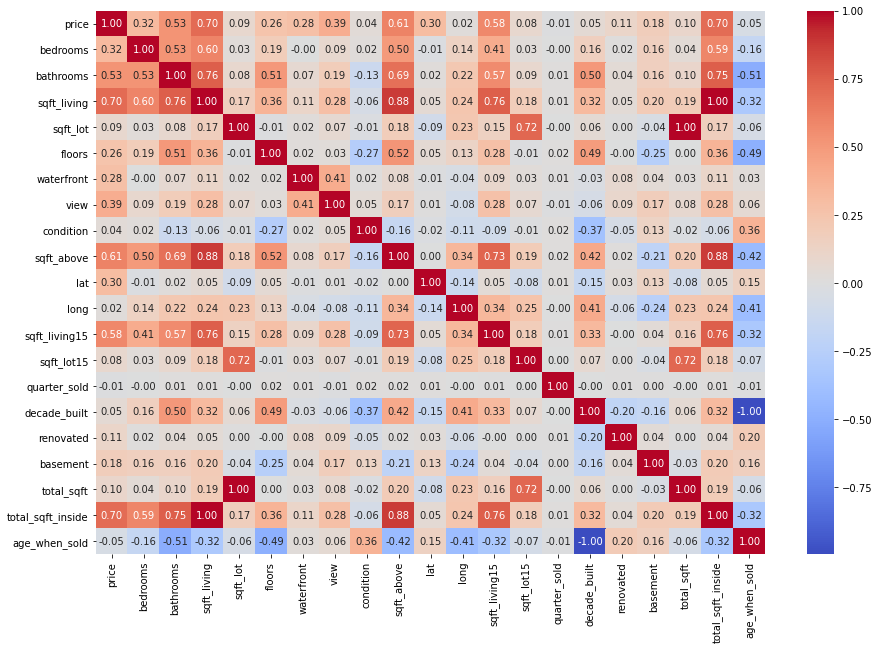

In [24]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(data_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# 4. Convert Categorical Columns

In [25]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,lat,long,sqft_living15,sqft_lot15,quarter_sold,decade_built,grade_binned,renovated,basement,total_sqft,total_sqft_inside,age_when_sold,city
0,538000.0,3,2.25,2570,7242,2.0,0,0,3,2170,47.7210,-122.319,1690,7639,4,1950,Fair,1,1,9812,2570.0,63,Seattle
1,571000.0,4,2.00,2750,7807,1.5,0,0,5,2250,47.7168,-122.287,1510,7807,2,1910,Fair,0,1,10557,2750.0,98,Seattle
2,315000.0,3,1.00,960,6634,1.0,0,0,3,960,47.7264,-122.310,1570,7203,2,1950,Fair,0,0,7594,960.0,62,Seattle
3,382500.0,2,1.00,1190,4440,1.0,0,0,3,1190,47.7135,-122.287,1060,5715,3,1980,Fair,0,0,5630,1190.0,33,Seattle
4,425000.0,3,1.75,2500,6840,1.0,0,0,3,1300,47.7222,-122.320,1580,8691,3,1950,Fair,0,1,9340,2500.0,57,Seattle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,3640000.0,5,6.00,5490,19897,2.0,0,0,3,5490,47.6165,-122.236,2910,17600,4,2000,High,0,0,25387,5490.0,9,Medina
19083,2720000.0,4,3.25,3990,18115,2.0,0,0,4,3990,47.6177,-122.229,3450,16087,4,1980,Good,0,0,22105,3990.0,25,Medina
19084,1950000.0,4,3.50,4065,18713,2.0,0,0,4,4065,47.6209,-122.237,3070,18713,3,1980,Good,0,0,22778,4065.0,27,Medina
19085,2900000.0,5,4.00,5190,14600,2.0,0,1,3,5190,47.6102,-122.225,3840,19250,4,2010,Good,0,0,19790,5190.0,1,Medina


In [26]:
categorical = ['waterfront','view','condition','quarter_sold','decade_built','renovated','grade_binned','basement','city']

In [27]:
# convert categorical columns to category
for column in data[categorical]:
    data[column] = data[column].astype('category')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 0 to 19086
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   price              19087 non-null  float64 
 1   bedrooms           19087 non-null  int64   
 2   bathrooms          19087 non-null  float64 
 3   sqft_living        19087 non-null  int64   
 4   sqft_lot           19087 non-null  int64   
 5   floors             19087 non-null  float64 
 6   waterfront         19087 non-null  category
 7   view               19087 non-null  category
 8   condition          19087 non-null  category
 9   sqft_above         19087 non-null  int64   
 10  lat                19087 non-null  float64 
 11  long               19087 non-null  float64 
 12  sqft_living15      19087 non-null  int64   
 13  sqft_lot15         19087 non-null  int64   
 14  quarter_sold       19087 non-null  category
 15  decade_built       19087 non-null  category
 16  grad

## Dummy Variables

Categorical variables need to be transformed which I created dummy variables for each of the categorical columns. I first created a separate dataframe for the dummies and then concatenated with the original dataset.

In [29]:
dummies_to_create = data.loc[:, (data.dtypes != np.float64) & (data.dtypes != np.int64)]
dummies_to_create.head()

,waterfront,view,condition,quarter_sold,decade_built,grade_binned,renovated,basement,city
0,0,0,3,4,1950,Fair,1,1,Seattle
1,0,0,5,2,1910,Fair,0,1,Seattle
2,0,0,3,2,1950,Fair,0,0,Seattle
3,0,0,3,3,1980,Fair,0,0,Seattle
4,0,0,3,3,1950,Fair,0,1,Seattle


In [30]:
# create dummies into a single dataframe
# drop_first is to avoid the dummy variable trap of multicollinearity
    # you can perfectly predict what one variable will be using some combination of the other variables
dummy_data = pd.get_dummies(dummies_to_create,drop_first=True)

In [31]:
# drop categorical columns since we created the dummy variables
data = data.drop(columns=['renovated', 'waterfront', 'view', 'condition', 'quarter_sold', 'decade_built',
                          'grade_binned','city','basement'],axis=1)

In [32]:
dummy_data.head()

,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,quarter_sold_2,quarter_sold_3,quarter_sold_4,decade_built_1910,decade_built_1920,decade_built_1930,decade_built_1940,decade_built_1950,decade_built_1960,decade_built_1970,decade_built_1980,decade_built_1990,decade_built_2000,decade_built_2010,grade_binned_Good,grade_binned_High,grade_binned_Poor,renovated_1,basement_1,city_Bellevue,city_BlackDiamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_FallCity,city_FederalWay,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_MapleValley,city_Medina,city_MercerIsland,city_NorthBend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# 5. Export Dummy Data

In [33]:
dummies_to_create.to_csv('csv_files/preprocessed_dummy_data.csv')

In [34]:
dummy_data.to_csv('csv_files/dummy_data.csv')

In [35]:
data.to_csv('csv_files/added_features_data.csv')